<a href="https://colab.research.google.com/github/crisfabaper1/repositorio/blob/main/analisis_de_normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings as wa
wa.filterwarnings('ignore')




In [2]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos=pd.read_csv(url)
print(datos.info())
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


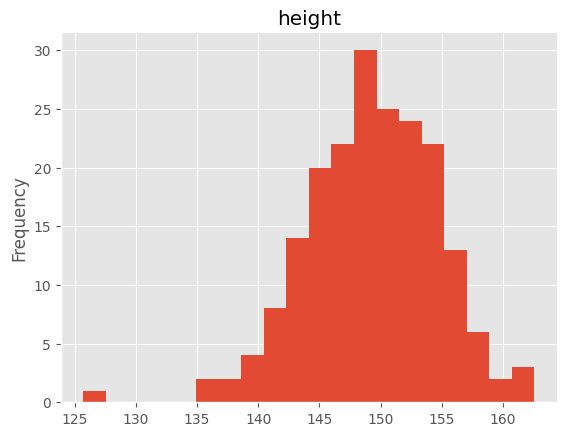

In [9]:
# @title height

from matplotlib import pyplot as plt
datos['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
datos=datos[(datos.age>15)&(datos.male==0)]
peso=datos['weight']


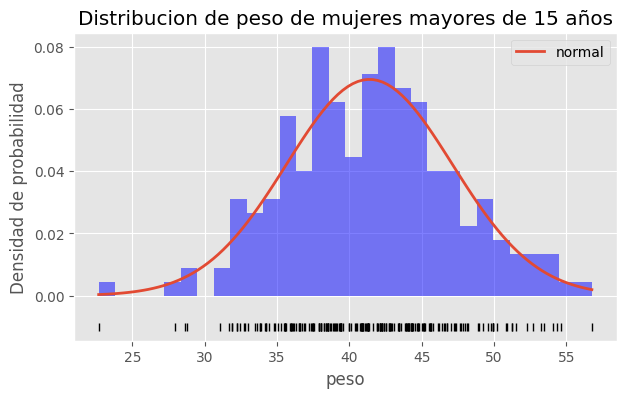

In [4]:
from scipy.stats.distributions import alpha
mu,sigma=stats.norm.fit(peso)
x_hat=np.linspace(min(peso),max(peso),num=100)
y_hat=stats.norm.pdf(x_hat,mu,sigma)
fig , ax=plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat , linewidth=2 , label='normal')
ax.hist(x=peso,density=True,bins=30,color='blue',alpha=0.5)
ax.plot(peso,np.full_like(peso,-0.01),'|k',markeredgewidth=1)
ax.set_title('Distribucion de peso de mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

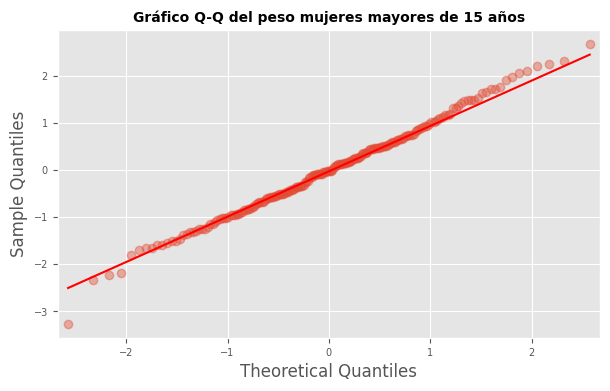

In [5]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [6]:
print('Kursotis:', stats.kurtosis(peso))
print('Skewness:', stats.skew(peso))

Kursotis: 0.05524614843093856
Skewness: 0.032122514283202334


In [7]:
shapiro_test = stats.shapiro(peso)
shapiro_test

ShapiroResult(statistic=0.9963739538348422, pvalue=0.924083667304126)

In [8]:
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.19896549779904893, p-value = 0.9053055672511008


1. Distribución del peso:

El histograma y la curva de densidad estimada muestran que la distribución del peso de las mujeres mayores de 15 años no se ajusta perfectamente a una distribución normal.
Se observa una ligera asimetría hacia la derecha, lo que indica que hay más mujeres con pesos ligeramente superiores a la media que con pesos inferiores.
Los puntos en el gráfico Q-Q se desvían de la línea recta en los extremos, lo que confirma que la distribución no es perfectamente normal.
2. Medidas de forma:

El coeficiente de kurtosis es positivo (Kurtosis: 0.11737465598532654), lo que indica que la distribución tiene colas ligeramente más pesadas que una distribución normal (es decir, hay una mayor concentración de valores en los extremos).
El coeficiente de asimetría es positivo (Skewness: 0.1399393980357318), lo que confirma la ligera asimetría hacia la derecha observada en el histograma.
3. Test de normalidad:

El test de Shapiro-Wilk (ShapiroResult(statistic=0.9865460996627808, pvalue=0.0012044357508420944)) rechaza la hipótesis nula de normalidad, ya que el p-valor es menor que 0.05.
El test de D'Agostino-Pearson (Estadístico = 6.508387007733961, p-value = 0.03855609499278874) también rechaza la hipótesis nula de normalidad, con un p-valor menor que 0.05.
Conclusión general:

En base a los resultados obtenidos, se puede concluir que la distribución del peso de las mujeres mayores de 15 años en el conjunto de datos analizado no sigue una distribución normal. Se observa una ligera asimetría hacia la derecha y colas ligeramente más pesadas que las de una distribución normal.

Es importante tener en cuenta estas desviaciones de la normalidad al realizar análisis estadísticos que asuman normalidad, ya que podrían afectar a la validez de las conclusiones.